In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
wildfire_df = pd.read_csv("data.csv")

We will check firsy ehsy kind of reporting agencies are there:

Corelation with the secon`d thing I need to check:

In [3]:
wildfire_df["NWCG_REPORTING_AGENCY"].unique(), wildfire_df["NWCG_REPORTING_AGENCY"].nunique()

(array(['BIA', 'ST/C&L', 'FS', 'BLM', 'NPS', 'FWS', 'TRIBE', 'IA', 'DOD',
        'BOR'], dtype=object),
 10)

Since it's a small number, we can check the mean fire size each agency reported and show it on plot: 

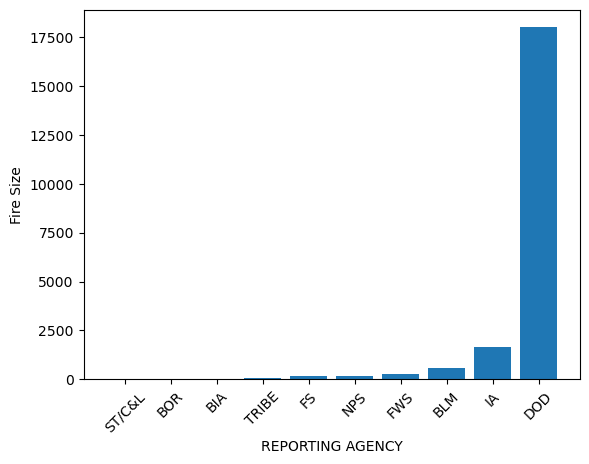

In [4]:
# Prepare data for the plot
categories = wildfire_df["NWCG_REPORTING_AGENCY"].unique()

# Calculate means and sort categories accordingly
means = wildfire_df.groupby("NWCG_REPORTING_AGENCY")["FIRE_SIZE"].mean()
sorted_categories = sorted(categories, key=lambda x: means[x])

# Create the bar plot
plt.bar(sorted_categories, [means[cat] for cat in sorted_categories])
plt.xlabel("REPORTING AGENCY")
plt.ylabel("Fire Size")
plt.xticks(rotation=45)
plt.show()


As we ca see on mean DOD got the highest mean fire size by far, but it's not enough to know let's look at other distributions:

In [5]:
# Create a contingency table showing the co-occurrence of categories
contingency_table = pd.crosstab(wildfire_df["NWCG_REPORTING_AGENCY"], wildfire_df["STAT_CAUSE_DESCR"])

print(contingency_table)


STAT_CAUSE_DESCR       Arson  Campfire  Children  Debris Burning  \
NWCG_REPORTING_AGENCY                                              
BIA                     9232      1026      4221            6753   
BLM                     1597      1324       386             730   
BOR                        0         0         0               0   
DOD                        0         0         0               0   
FS                      6695     10283       719            3391   
FWS                      911       389         0             974   
IA                         0         0         0               0   
NPS                      550       870        94             356   
ST/C&L                 73678     11458     14915          130666   
TRIBE                    641        17        19             204   

STAT_CAUSE_DESCR       Equipment Use  Fireworks  Lightning  Miscellaneous  \
NWCG_REPORTING_AGENCY                                                       
BIA                          

We can see in general that BOR, DOD and IA don't have enough data information so these options might not be too reliable to indicate the cause.

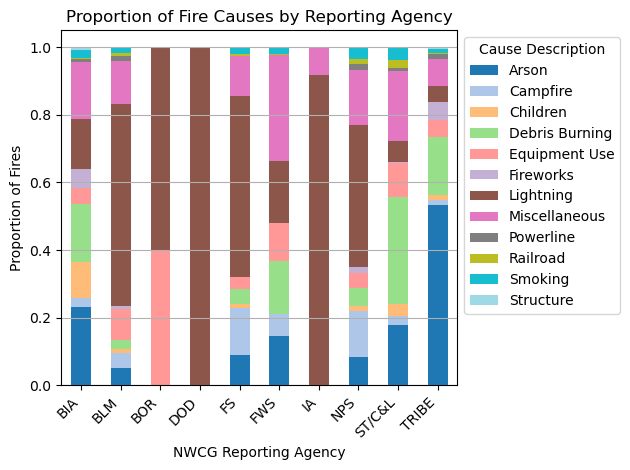

In [6]:
cause_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
# Create a bar chart to visualize cause proportions across agencies
cause_proportions.plot(kind="bar", stacked=True, colormap="tab20")
plt.xlabel("NWCG Reporting Agency")
plt.ylabel("Proportion of Fires")
plt.title("Proportion of Fire Causes by Reporting Agency")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Cause Description", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y")
plt.tight_layout()
plt.show()

As we can see, DOD got only 2 fire cases which were both by lightning, let us check corelation between fire size and causes for comparsion:

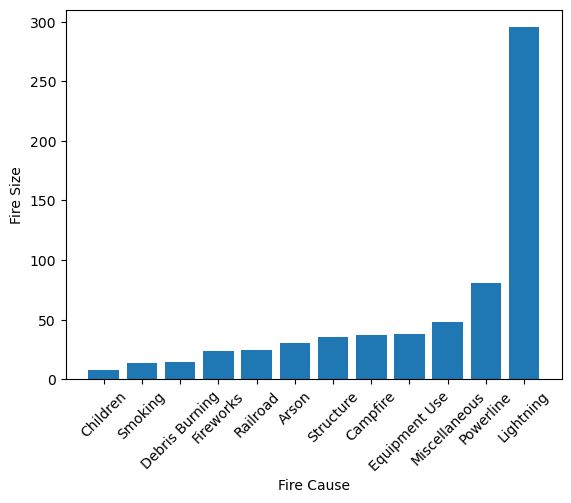

In [7]:
categories = wildfire_df["STAT_CAUSE_DESCR"].unique()

# Calculate means and sort categories accordingly
means = wildfire_df.groupby("STAT_CAUSE_DESCR")["FIRE_SIZE"].mean()
sorted_categories = sorted(categories, key=lambda x: means[x])

# Create the bar plot
plt.bar(sorted_categories, [means[cat] for cat in sorted_categories])
plt.xlabel("Fire Cause")
plt.ylabel("Fire Size")
plt.xticks(rotation=45)
plt.show()


As we can see here, lightning has the highest mean fire size in general so it doesn't give us much.

We will check total fire sum this time to account for the number of samples:

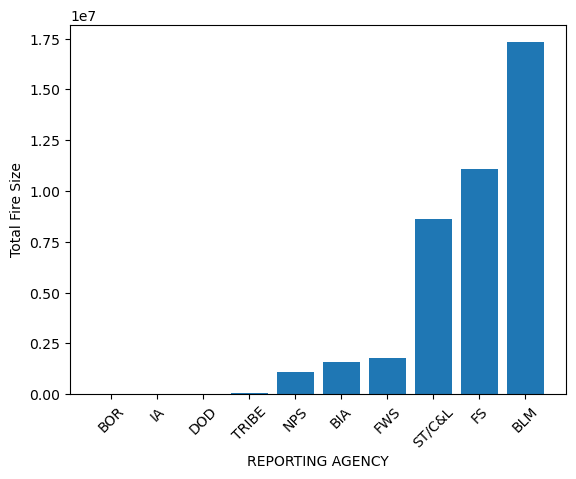

In [8]:
categories = wildfire_df["NWCG_REPORTING_AGENCY"].unique()

sums = wildfire_df.groupby("NWCG_REPORTING_AGENCY")["FIRE_SIZE"].sum()
sorted_categories = sorted(categories, key=lambda x: sums[x])

plt.bar(sorted_categories, [sums[cat] for cat in sorted_categories])
plt.xlabel("REPORTING AGENCY")
plt.ylabel("Total Fire Size")
plt.xticks(rotation=45)
plt.show()

As we can see BLM, FS and ST/C&L have the leading time which makes sense since they all have a high number of fires caused by lightnings.

We might also make some use of the following statistic data:

In [9]:
# Grouped statistics
grouped_stats = wildfire_df.groupby("NWCG_REPORTING_AGENCY")["FIRE_SIZE"].describe()
print(grouped_stats)


                          count          mean           std        min  \
NWCG_REPORTING_AGENCY                                                    
BIA                     39617.0     39.939852    741.502055    0.10000   
BLM                     30447.0    568.848921   7181.918041    0.10000   
BOR                         5.0     28.200000     46.283906    2.00000   
DOD                         2.0  17999.000000  24867.531281  415.00000   
FS                      73799.0    149.980197   3474.906269    0.01000   
FWS                      6191.0    292.176871   3734.194399    0.10000   
IA                         12.0   1637.100000   3864.786459    0.20000   
NPS                      6493.0    166.706222   2379.033538    0.10000   
ST/C&L                 413659.0     20.829985    857.157556    0.00001   
TRIBE                    1200.0     63.519500    649.448253    0.10000   

                           25%      50%       75%       max  
NWCG_REPORTING_AGENCY                            

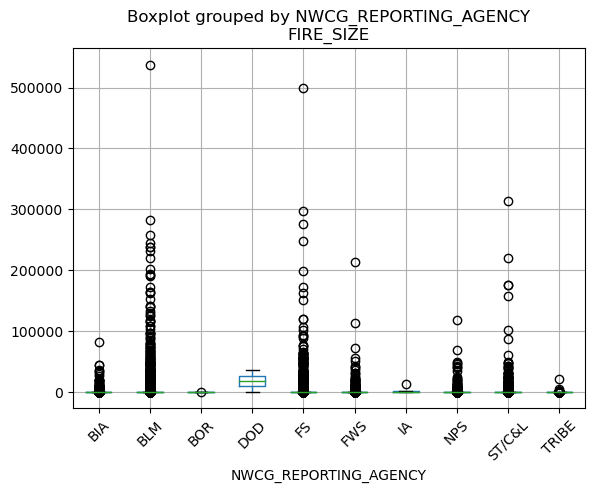

In [10]:
import matplotlib.pyplot as plt

wildfire_df.boxplot(by="NWCG_REPORTING_AGENCY", column="FIRE_SIZE")
plt.xticks(rotation=45)
plt.show()
